## 1. Load the data

We'll need:
- Pandas library to load, prepare, and analyze the data
- Numpy to simplify sorting and math operations for arrays & series
- Stats from Scipy to compare sample means and obtain p-value
- Pyplot from matplotlib & Seaborn to plot data
- Scikit-learn for linear regression model and testing

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data from csv file
#df_games = pd.read_csv('./moved_games.csv') changed by reviewer
df_games = pd.read_csv('/datasets/games.csv')
df_games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2. Prepare the data

In [3]:
# Change column names to lowercase
df_games.columns = df_games.columns.str.lower()

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Change year_of_release from float to int
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

# Replace TBD in user score column with NaN and change from object to float
df_games['user_score'].replace('tbd', np.nan, inplace=True)
df_games['user_score'] = df_games['user_score'].astype(float)

df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [6]:
# Count null values
df_games.isnull().sum()


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [7]:
# Check for duplicate rows
df_games.duplicated().sum()


0

In [8]:
# Drop rows with empty values in name column
df_games = df_games.dropna(subset=['name'])


In [9]:
# Get number of blank critic scores for each year of release
df_games[df_games['critic_score'].isnull()]['year_of_release'].value_counts()

2009    775
2010    755
2008    712
2011    636
2007    505
2006    386
2015    381
1998    351
2012    332
2014    320
1999    299
2005    284
1997    272
2013    271
2016    270
1996    255
1995    219
2000    207
2002    202
2004    201
2003    190
2001    156
1994    120
1993     60
1981     46
1992     42
1991     41
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1984     14
1988     14
1985     13
1980      9
Name: year_of_release, dtype: Int64

In [10]:
# Get number of games released each year
df_games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Possible reason for not having critic and/or user scores is that the amount of games released grew quickly since the late 1990s and not all games were getting critic and user reviews.

In [11]:
# Add total_sales column to df_games
df_games['total_sales'] = df_games['na_sales'] + \
    df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.sort_values('total_sales', ascending=False)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16181,Sakura Sakura: Haru Urara,PSP,2010,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00


Replace missing values in year_of_release column by the median value

In [12]:
# Calculate the median value of the 'Year_of_Release' column
median_year = df_games['year_of_release'].median()

# Fill the missing values in the 'Year_of_Release' column with the median value
df_games['year_of_release'].fillna(median_year, inplace=True)

In [13]:
# Basic statistics for total sales
df_games['total_sales'].describe()


count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Check if there's a correlation between critic_score & user_score. If there is, use the critic score or user score to fill the missing value if one of the values is available.

In [14]:
# Filter rows that have a user_score & critic_score values 
user_score_not_null = df_games['user_score'].notnull() & df_games['critic_score'].notnull()
df_filtered = df_games[user_score_not_null]
df_filtered


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16673,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


In [15]:
# Calculate correlation between critic score to user score
corr = df_filtered['critic_score'].corr(df_filtered['user_score'])
print("Correlation between critic score & user score:", corr)


Correlation between critic score & user score: 0.5808778320767236


There's moderately positive correlation between user_score & critic_score and can use the value of one to fill the other.

Linear Regression model to predict user score values from critic score

In [16]:
# separate the features (X) and the target variable (y)
X = df_filtered['critic_score'].values.reshape(-1, 1)
y = df_filtered['user_score']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# train the linear regression model
regression_model_user_from_critic = LinearRegression()
regression_model_user_from_critic.fit(X_train, y_train)

y_pred = regression_model_user_from_critic.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R2 score:", r2)

Mean squared error: 1.4255209374993214
R2 score: 0.346944186694533


In [17]:
# Replacing user score with critic score using linear regression model
user_score_null_critic_not_null = df_games['user_score'].isnull(
) & df_games['critic_score'].notnull()

df_games.loc[user_score_null_critic_not_null, [
    'user_score']] = regression_model_user_from_critic.predict(df_games.loc[user_score_null_critic_not_null, 'critic_score'].values.reshape(-1, 1))

# round calculated user score values to 1st decimal
df_games.loc[user_score_null_critic_not_null, [
    'user_score']] = round(df_games.loc[user_score_null_critic_not_null, ['user_score']],1)

df_games.loc[user_score_null_critic_not_null]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
182,Tomb Raider II,PS,1997,Action,2.30,2.46,0.2,0.28,85.0,8.1,T,5.24
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,6.6,E10+,3.97
440,Need for Speed III: Hot Pursuit,PS,1998,Racing,2.14,0.86,0.0,0.13,88.0,8.3,E,3.13
637,Riven: The Sequel to Myst,PC,1997,Adventure,1.52,0.82,0.0,0.10,83.0,8.0,E,2.44
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,7.2,E,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...
16577,Space Raiders,GC,2003,Shooter,0.01,0.00,0.0,0.00,40.0,5.4,T,0.01
16669,Super Robot Taisen: Original Generation,GBA,2002,Role-Playing,0.01,0.00,0.0,0.00,72.0,7.3,T,0.01
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,7.0,E,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,6.2,E,0.01


Linear Regression model to predict critic score values from user score

In [18]:
# separate the features (X) and the target variable (y)
X = df_filtered['user_score'].values.reshape(-1, 1)
y = df_filtered['critic_score']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# train the linear regression model
regression_model_critic_from_user = LinearRegression()
regression_model_critic_from_user.fit(X_train, y_train)

y_pred = regression_model_critic_from_user.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R2 score:", r2)

Mean squared error: 131.109245163767
R2 score: 0.34811503730749593


In [19]:
# Replacing critic score with user score using linear regression model
critic_score_null_user_not_null = df_games['critic_score'].isnull(
) & df_games['user_score'].notnull()

df_games.loc[critic_score_null_user_not_null, [
    'critic_score']] = regression_model_critic_from_user.predict(df_games.loc[critic_score_null_user_not_null, 'user_score'].values.reshape(-1, 1))

# round calculated critic score values to 1st decimal
df_games.loc[critic_score_null_user_not_null, [
    'critic_score']] = round(df_games.loc[critic_score_null_user_not_null, ['critic_score']],1)

df_games.loc[critic_score_null_user_not_null]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,57.0,4.8,M,4.36
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,57.5,4.9,M,4.28
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,55.3,4.5,E,4.28
291,World Soccer Winning Eleven 9,PS2,2005,Sports,0.12,2.26,0.90,0.77,75.9,8.2,E,4.05
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,64.8,6.2,E10+,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16636,Deal or No Deal,PC,2006,Misc,0.00,0.01,0.00,0.00,72.0,7.5,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,67.0,6.6,E,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,58.6,5.1,E10+,0.01
16661,Bookworm Deluxe,PC,2006,Puzzle,0.01,0.00,0.00,0.00,74.8,8.0,E,0.01


In [20]:
df_games.isnull().sum()


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8003
user_score         8003
rating             6764
total_sales           0
dtype: int64

## 3. Analyze the data

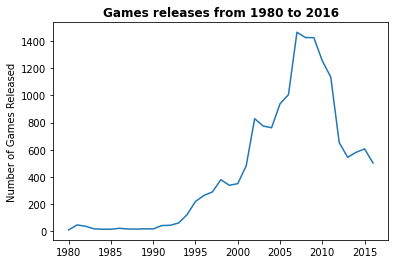

In [21]:
# Game releases by year using .value_counts()
df_games['year_of_release'].value_counts()

# use Seaborn's lineplot() function to create a line plot
sns.lineplot(data=df_games['year_of_release'].value_counts())

# set chart title
plt.title('Games releases from 1980 to 2016',
          fontweight='bold', fontsize=12)

# set the label for the y-axis
plt.ylabel('Number of Games Released')

# show the plot
plt.show()


Number of games released annually grew exponentially between 1990 and 2008

In [22]:
# Get total sales by plaftorm
df_games.groupby(['platform'])[
    'total_sales'].sum().sort_values(ascending=False)


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [23]:
# Platform sales by year
df_games_yearly_total_sales_by_platform = df_games.groupby(
    ['platform', 'year_of_release'])['total_sales'].sum()

# filter by top 10 plaftorms by total sales
df_games_yearly_total_sales_top_10_platform = df_games_yearly_total_sales_by_platform[[
    'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']].to_frame().reset_index()
df_games_yearly_total_sales_top_10_platform


,platform,year_of_release,total_sales
0,PS2,2000,39.17
1,PS2,2001,166.43
2,PS2,2002,205.38
3,PS2,2003,184.31
4,PS2,2004,211.81
...,...,...,...
113,PC,2012,23.22
114,PC,2013,12.38
115,PC,2014,13.28
116,PC,2015,8.52


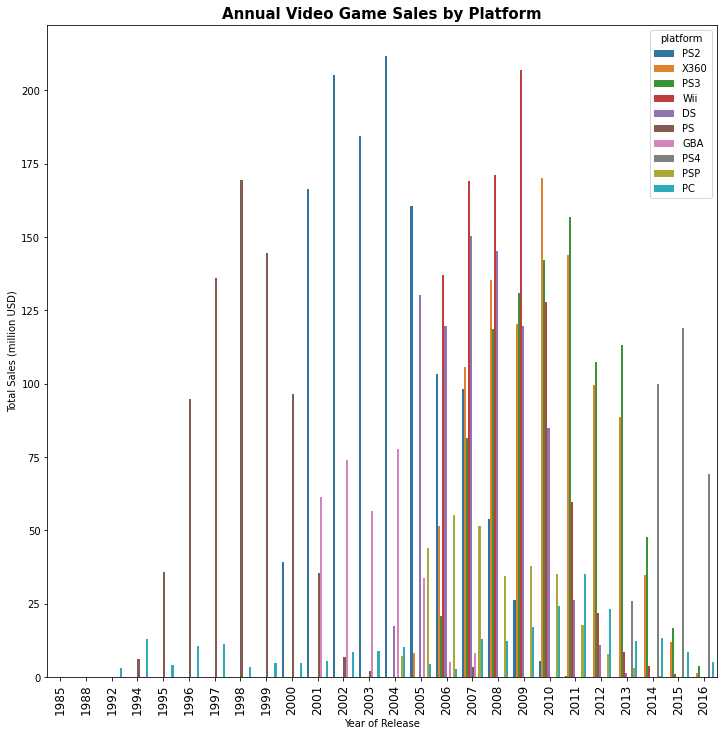

In [24]:
# Bar chart to show sales for top 10 platforms by year
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.barplot(data=df_games_yearly_total_sales_top_10_platform, x="year_of_release", y="total_sales", hue="platform"
                 )
ax.tick_params(axis='x', rotation=90, labelsize=12)
plt.title('Annual Video Game Sales by Platform',
          fontweight='bold', fontsize=15)
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (million USD)')
plt.show()


Except PC, platform sales last 5-7 years. Since the main goal is to build a prognosis for 2017, we can exclude data prior to 2010.

In [25]:
# Filter by year of release equal or greater than 2010
df_games_2010_to_2016 = df_games[df_games['year_of_release'] >= 2010]
df_games_2010_to_2016


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [26]:
# Annual sales by platform for games released in 2010 and beyond
df_games_2010_to_2016_total_sales_by_platform = df_games_2010_to_2016.groupby(
    ['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending=False).to_frame().reset_index()
df_games_2010_to_2016_total_sales_by_platform


,platform,year_of_release,total_sales
0,X360,2010,170.03
1,PS3,2011,156.78
2,X360,2011,143.84
3,PS3,2010,142.17
4,Wii,2010,127.95
...,...,...,...
60,Wii,2015,1.14
61,PS2,2011,0.45
62,PSP,2014,0.24
63,Wii,2016,0.18


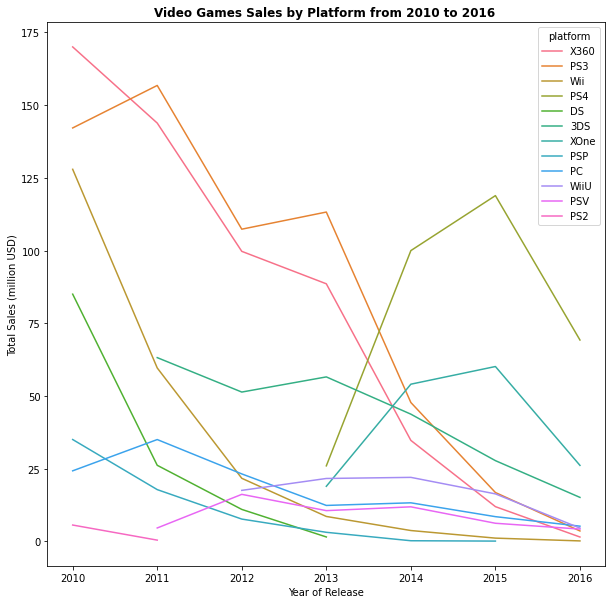

In [27]:
# Line plot to show tred of sales for top 10 platforms by year
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(data=df_games_2010_to_2016_total_sales_by_platform,
                  x="year_of_release", y="total_sales", hue="platform")
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (million USD)')
plt.title('Video Games Sales by Platform from 2010 to 2016 ',
          fontweight='bold', fontsize=12)
plt.show()


PS4 & XOne have growing sales since 2013 while sales for all other platforms are declining, especially for PS3 & X360.

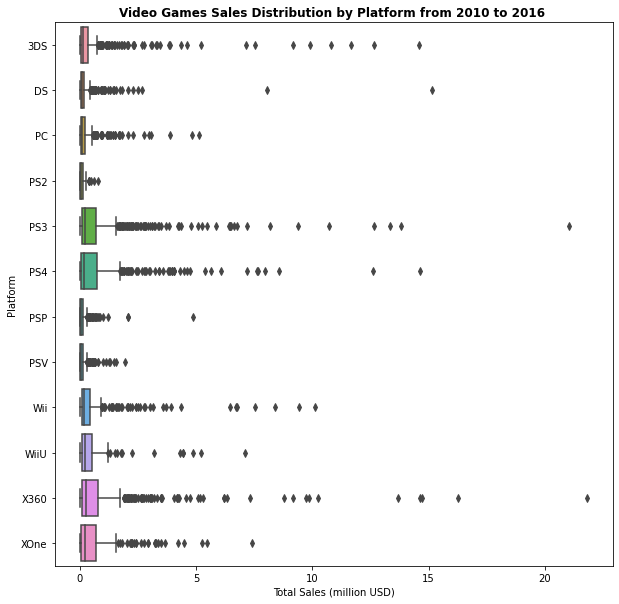

In [28]:
# Box plot for the global sales of 2010+ titles, broken down by platform
df_games_2010_to_2016_total_sales_by_platform = df_games_2010_to_2016.groupby(
    ['platform', 'name'])['total_sales'].sum()
df_games_2010_to_2016_total_sales_by_platform = df_games_2010_to_2016_total_sales_by_platform.to_frame().reset_index()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(data=df_games_2010_to_2016_total_sales_by_platform,
                 x='total_sales', y='platform')
plt.title('Video Games Sales Distribution by Platform from 2010 to 2016 ',
          fontweight='bold', fontsize=12)
plt.xlabel('Total Sales (million USD)')
plt.ylabel('Platform')
plt.show()


There are large variations among sales of games 

In [29]:
# Average sales for each platform
df_games_2010_to_2016.groupby(['platform'])[
    'total_sales'].mean().sort_values(ascending=False)


platform
X360    0.809426
PS4     0.801378
PS3     0.661125
XOne    0.645020
WiiU    0.559116
3DS     0.503535
Wii     0.495489
PC      0.254614
DS      0.244083
PS2     0.135333
PSP     0.128100
PSV     0.125431
Name: total_sales, dtype: float64

In [30]:
df_games_2010_to_2016_top_25_games = df_games_2010_to_2016.groupby(['name'])['total_sales'].sum(
).sort_values(ascending=False).to_frame().head(25)
df_games_2010_to_2016_top_25_games


,total_sales
name,
Grand Theft Auto V,56.58
Call of Duty: Modern Warfare 3,30.60
Call of Duty: Black Ops II,29.40
Call of Duty: Black Ops,29.20
Call of Duty: Ghosts,27.39
Call of Duty: Black Ops 3,25.67
Minecraft,24.16
Call of Duty: Advanced Warfare,21.97
Kinect Adventures!,21.82


In [31]:
df_games_2010_to_2016_top_25_games_platform_sales = pd.merge(df_games_2010_to_2016_top_25_games, df_games_2010_to_2016, on='name', how='left').groupby(
    ['name', 'platform'])['total_sales_y'].sum().to_frame()
df_games_2010_to_2016_top_25_games_platform_sales = df_games_2010_to_2016_top_25_games_platform_sales.rename(columns={'total_sales_y': 'total_sales'}).reset_index()
df_games_2010_to_2016_top_25_games_platform_sales


,name,platform,total_sales
0,Assassin's Creed III,PC,0.93
1,Assassin's Creed III,PS3,6.44
2,Assassin's Creed III,WiiU,0.35
3,Assassin's Creed III,X360,5.29
4,Assassin's Creed IV: Black Flag,PC,0.65
...,...,...,...
106,The Elder Scrolls V: Skyrim,PC,3.88
107,The Elder Scrolls V: Skyrim,PS3,6.40
108,The Elder Scrolls V: Skyrim,PS4,1.32
109,The Elder Scrolls V: Skyrim,X360,8.79


In [32]:
df_games_2010_to_2016_top_25_games_platform_count = df_games_2010_to_2016_top_25_games_platform_sales.groupby(['name'])['platform'].count(
).sort_values(ascending=False).reset_index()
df_games_2010_to_2016_top_25_games_platform_count


,name,platform
0,FIFA 14,9
1,FIFA 15,8
2,FIFA Soccer 13,8
3,FIFA 12,7
4,Minecraft,6
5,Assassin's Creed IV: Black Flag,6
6,Call of Duty: Ghosts,6
7,Grand Theft Auto V,5
8,FIFA 16,5
9,The Elder Scrolls V: Skyrim,5


In [33]:
df_games_2010_to_2016_top_25_games_platform_count.describe()


,platform
count,25.000000
mean,4.440000
std,2.256103
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,9.000000


75% + of the top 25 selling titles are available on 3+ platforms, so platform availability is important in achieving high global sales for a title

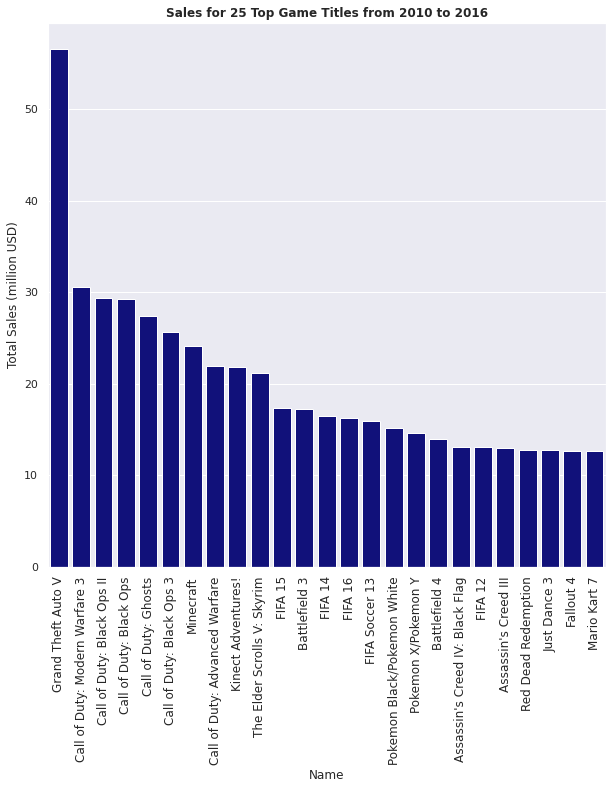

In [34]:
# Total sales for 25 top selling game titles

# set plot style:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 10))
total = df_games_2010_to_2016_top_25_games.reset_index()
bar1 = sns.barplot(x="name",  y="total_sales", data=total, color='darkblue')
plt.tick_params(axis='x', rotation=90, labelsize=12)
plt.xlabel('Name')
plt.ylabel('Total Sales (million USD)')
plt.title('Sales for 25 Top Game Titles from 2010 to 2016',
          fontweight='bold', fontsize=12)

plt.show()


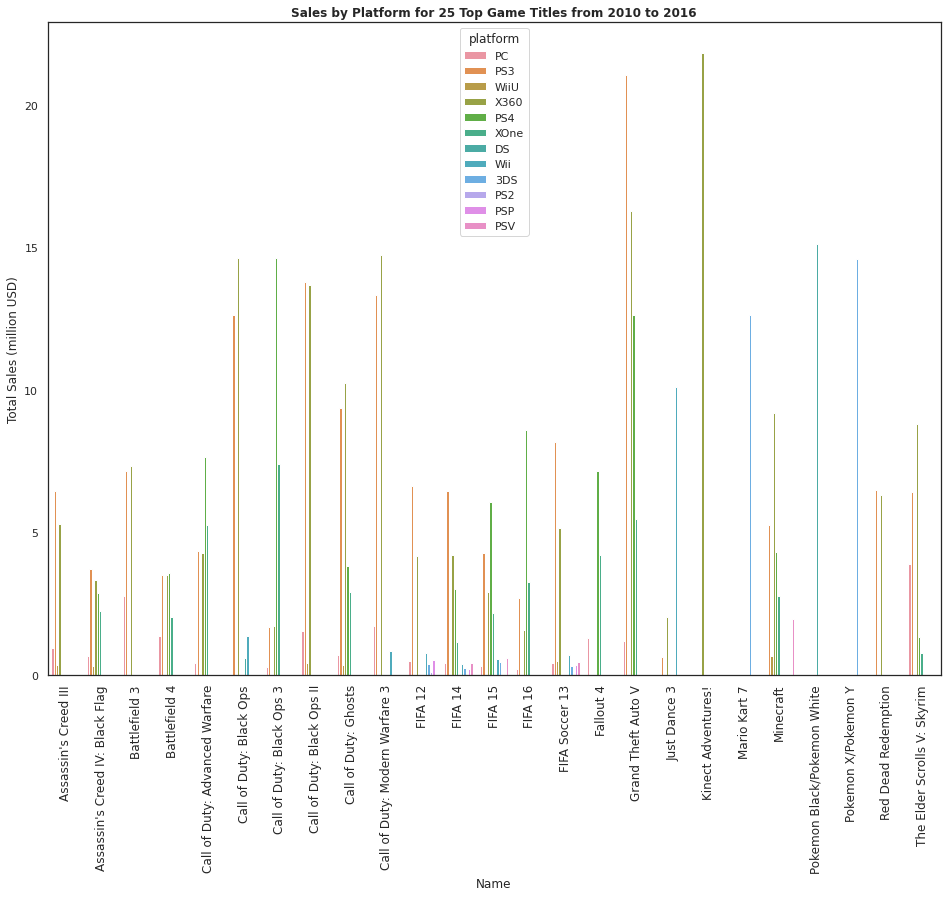

In [35]:
# Total sales by platform for 25 top selling game titles

# set plot style: grey grid in the background:
sns.set(style="white")

plt.figure(figsize=(16, 12))
sns.barplot(x="name",  y="total_sales", hue="platform", data=df_games_2010_to_2016_top_25_games_platform_sales)
plt.tick_params(axis='x', rotation=90, labelsize=12)
plt.xlabel('Name')
plt.ylabel('Total Sales (million USD)')
plt.title('Sales by Platform for 25 Top Game Titles from 2010 to 2016',
          fontweight='bold', fontsize=12)

plt.show()


Focusing on the PS3, one of the most popular platforms

In [36]:
# Filter data by PS3 platform
df_games_2010_to_2016_ps3 = df_games_2010_to_2016[df_games_2010_to_2016['platform'] == "PS3"]
df_games_2010_to_2016_ps3


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


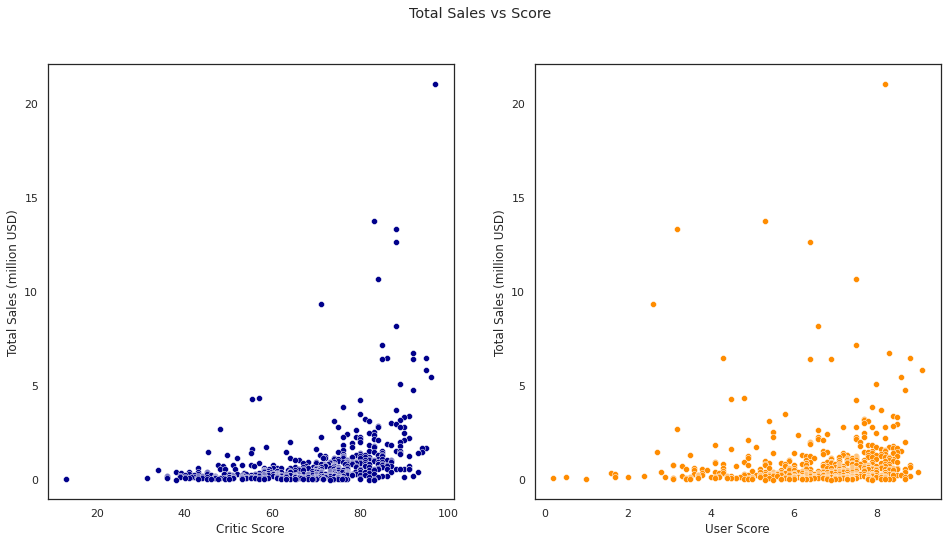

In [37]:
# Create one row with 2 charts
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Create a scatter plot for critic score
sns.scatterplot(data=df_games_2010_to_2016_ps3, x="critic_score",
                y="total_sales", ax=axes[0], color='darkblue')
# Create a scatter plot for user score
sns.scatterplot(data=df_games_2010_to_2016_ps3, x="user_score",
                y="total_sales", ax=axes[1], color='darkorange')

fig.suptitle('Total Sales vs Score')

# Set x and y-axis labels for the first subplot
axes[0].set_xlabel('Critic Score')
axes[0].set_ylabel('Total Sales (million USD)')

# Set x and y-axis labels for the second subplot
axes[1].set_xlabel('User Score')
axes[1].set_ylabel('Total Sales (million USD)')

plt.show()


In [38]:
# Calculate correlation between critic score & total sales
corr_critic_total_sale = df_games_2010_to_2016_ps3['critic_score'].corr(
    df_filtered['total_sales'])
print(corr_critic_total_sale)


0.3936035470871838


In [39]:
# Calculate correlation between user score & total sales
corr_user_total_sale = df_games_2010_to_2016_ps3['user_score'].corr(
    df_filtered['total_sales'])
print(corr_user_total_sale)


0.08273559916957503


The PS3 titles with the highest sales have high critic scores but there are many titles with high critic scores with low sales. It's similar with user score plot but there are titles here with high sales and low user score. It seems that critic score is a better predictor of how successful a title will be but scores overall don't have a strong correlation with how well a title will sell, evidenced by low correlation coefficients, 0.39 for critic score and 0.08 for users.

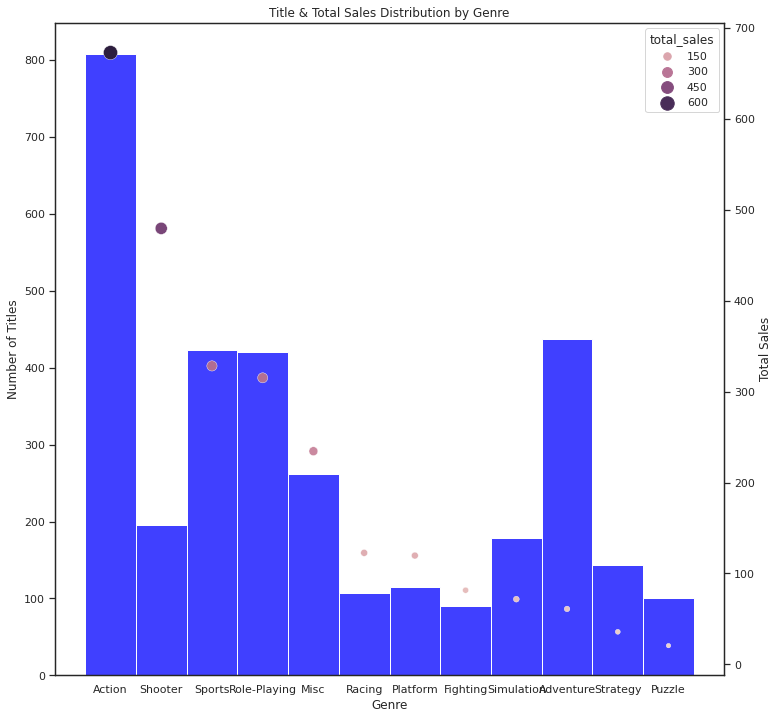

In [40]:
# Distribution of titles and sales by genre

# Drop duplicate titles to avoid double counting genre
df_games_2010_to_2016_unique_titles = df_games_2010_to_2016.groupby(['name']).agg(
    {'total_sales': 'sum', 'genre': 'first'}).sort_values('total_sales', ascending=False).reset_index()

# Group by genre and sum total sales
df_games_2010_to_2016_genre = df_games_2010_to_2016.groupby(['genre']).agg(
    {'total_sales': 'sum'}).sort_values('total_sales', ascending=False).reset_index()

# create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(12, 12))

# create the histogram using seaborn
sns.histplot(ax=ax1, data=df_games_2010_to_2016_unique_titles,
             x='genre', color='blue')

# set the title, x-axis, and y-axis labels for histogram
ax1.set_title('Title & Total Sales Distribution by Genre')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Number of Titles')

# create a second y-axis on the right side
ax2 = ax1.twinx()

# create the bar plot using seaborn
sns.scatterplot(ax=ax2, data=df_games_2010_to_2016_genre, x='genre', y='total_sales', estimator=sum, ci=None, color='orange',
                hue="total_sales", size="total_sales",
                sizes=(20, 200))

# set the y-axis label for the bar plot
ax2.set_ylabel('Total Sales')

# show the plot
plt.show()


The most profitable genres are Action, Shooter, Sports, and Role-Playing and number of titles trends with the total sales, except for the Shooter and Adventure genres.

## 4. User profile by region

In [41]:
df_games_2010_to_2016_platform_sales_by_region = df_games_2010_to_2016.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
df_games_2010_to_2016_platform_sales_by_region


,na_sales,eu_sales,jp_sales
platform,,,
3DS,82.65,61.27,100.62
DS,59.66,28.06,27.90
PC,39.07,68.82,0.00
PS2,2.32,1.67,0.80
PS3,229.25,213.60,59.26
PS4,108.74,141.09,15.96
PSP,9.65,7.59,42.20
PSV,12.47,13.07,21.84
Wii,121.20,65.91,17.75


In [42]:
top_five_platforms = df_games_2010_to_2016_platform_sales_by_region.sum(axis=1).sort_values(ascending=False).head(5).index
top_five_platforms
top_five_platforms_sales = df_games_2010_to_2016_platform_sales_by_region.loc[top_five_platforms]
top_five_platforms_sales

,na_sales,eu_sales,jp_sales
platform,,,
X360,334.18,163.41,5.46
PS3,229.25,213.60,59.26
PS4,108.74,141.09,15.96
3DS,82.65,61.27,100.62
Wii,121.20,65.91,17.75


In [43]:
df_games_2010_to_2016_platform_na = df_games_2010_to_2016.groupby(
    ['platform'])['na_sales'].sum().sort_values(ascending=False)
df_games_2010_to_2016_top_5_platform_na = df_games_2010_to_2016_platform_na.head(
    5).to_frame()
df_games_2010_to_2016_top_5_platform_na['na_market_share'] = round(
    df_games_2010_to_2016_top_5_platform_na/df_games_2010_to_2016_platform_na.sum()*100, 1)
df_games_2010_to_2016_top_5_platform_na


,na_sales,na_market_share
platform,,
X360,334.18,29.6
PS3,229.25,20.3
Wii,121.20,10.7
PS4,108.74,9.6
XOne,93.12,8.2


In [44]:
df_games_2010_to_2016_platform_eu = df_games_2010_to_2016.groupby(
    ['platform'])['eu_sales'].sum().sort_values(ascending=False)
df_games_2010_to_2016_top_5_platform_eu = df_games_2010_to_2016_platform_eu.head(
    5).to_frame()
df_games_2010_to_2016_top_5_platform_eu['eu_market_share'] = round(
    df_games_2010_to_2016_top_5_platform_eu/df_games_2010_to_2016_platform_eu.sum()*100, 1)
df_games_2010_to_2016_top_5_platform_eu


,eu_sales,eu_market_share
platform,,
PS3,213.60,25.4
X360,163.41,19.4
PS4,141.09,16.8
PC,68.82,8.2
Wii,65.91,7.8


In [45]:
df_games_2010_to_2016_platform_jp = df_games_2010_to_2016.groupby(
    ['platform'])['jp_sales'].sum().sort_values(ascending=False)
df_games_2010_to_2016_top_5_platform_jp = df_games_2010_to_2016_platform_jp.head(
    5).to_frame()
df_games_2010_to_2016_top_5_platform_jp['jp_market_share'] = round(
    df_games_2010_to_2016_top_5_platform_jp/df_games_2010_to_2016_platform_jp.sum()*100, 1)
df_games_2010_to_2016_top_5_platform_jp


,jp_sales,jp_market_share
platform,,
3DS,100.62,33.0
PS3,59.26,19.4
PSP,42.20,13.8
DS,27.90,9.1
PSV,21.84,7.2


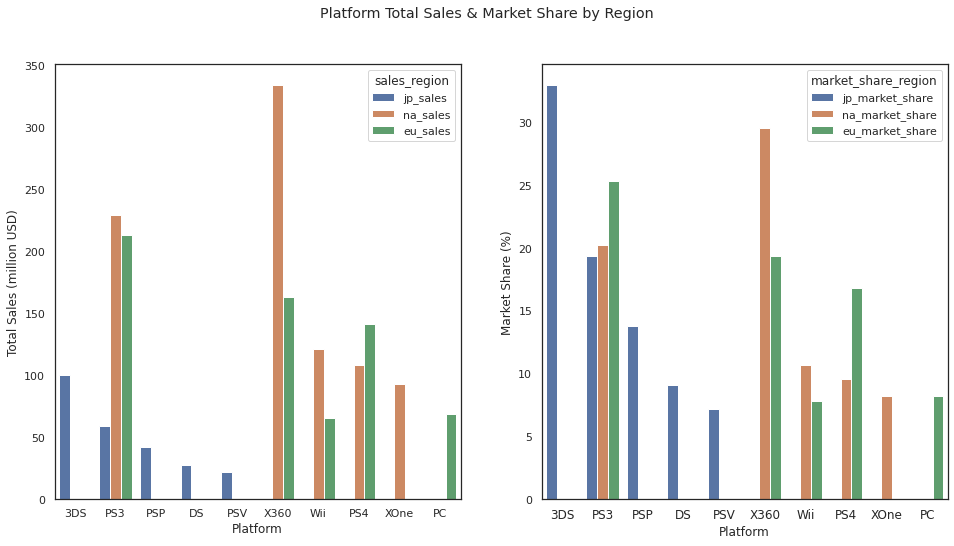

In [46]:
# Bar plot to compare top 5 platforms by regional sales & market share across regions

df_platform_jp_na_merged = pd.merge(
    df_games_2010_to_2016_top_5_platform_jp, df_games_2010_to_2016_top_5_platform_na, on='platform', how='outer')

df_platform_regions_merged = pd.merge(
    df_platform_jp_na_merged, df_games_2010_to_2016_top_5_platform_eu, on='platform', how='outer')
df_platform_regions_merged.reset_index(inplace=True)
df_platform_regions_merged.fillna(0, inplace=True)

df_platform_regions_market_share = df_platform_regions_merged.fillna(
    0)

df_platform_regions_merged.drop(
    columns={'jp_market_share', 'eu_market_share', 'na_market_share'}, inplace=True)

df_platform_regions_market_share.drop(
    columns={'jp_sales', 'eu_sales', 'na_sales'}, inplace=True)

# use melt() to change from short to long form for plotting
df_melted_sales = df_platform_regions_merged.melt(
    id_vars=['platform'], var_name='sales_region', value_name='sales')

df_melted_mkt_share = df_platform_regions_market_share.melt(
    id_vars=['platform'], var_name='market_share_region', value_name='market_share')

# set plot style: grey grid in the background:
sns.set(style="white")

# set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(x='platform', y='sales', hue='sales_region',
            data=df_melted_sales, ax=axes[0])

sns.barplot(x='platform', y='market_share',
            hue='market_share_region', data=df_melted_mkt_share, ax=axes[1])

# x-axis tick label
plt.tick_params(axis='x', labelsize=12)

fig.suptitle('Platform Total Sales & Market Share by Region')

# Set x and y-axis labels for the first subplot
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Total Sales (million USD)')

# Set x and y-axis labels for the second subplot
axes[1].set_xlabel('Platform')
axes[1].set_ylabel('Market Share (%)')

# show the graph
plt.show()


The top 5 platforms differ across regions and so do their sales and % of regional market share. There is more overlap between the NA & EU regions than with JP. The only common top 5 platform across regions is PS3 and has close market share (20% - 25%) among the three.

Similar analysis by genre

In [47]:
df_games_2010_to_2016_genre_na = df_games_2010_to_2016.groupby(
    ['genre'])['na_sales'].sum().sort_values(ascending=False).head(5).to_frame()
df_games_2010_to_2016_genre_na['na_market_share'] = round(
    df_games_2010_to_2016_genre_na/df_games_2010_to_2016_genre_na.sum()*100, 1)
df_games_2010_to_2016_genre_na


,na_sales,na_market_share
genre,,
Action,290.64,31.6
Shooter,237.47,25.8
Sports,156.81,17.0
Misc,123.80,13.4
Role-Playing,112.05,12.2


In [48]:
df_games_2010_to_2016_genre_eu = df_games_2010_to_2016.groupby(
    ['genre'])['eu_sales'].sum().sort_values(ascending=False).head(5).to_frame()
df_games_2010_to_2016_genre_eu['eu_market_share'] = round(
    df_games_2010_to_2016_genre_eu/df_games_2010_to_2016_genre_eu.sum()*100, 1)
df_games_2010_to_2016_genre_eu


,eu_sales,eu_market_share
genre,,
Action,233.63,35.2
Shooter,171.45,25.8
Sports,116.84,17.6
Role-Playing,75.48,11.4
Misc,66.09,10.0


In [49]:
df_games_2010_to_2016_genre_jp = df_games_2010_to_2016.groupby(
    ['genre'])['jp_sales'].sum().sort_values(ascending=False).head(5).to_frame()
df_games_2010_to_2016_genre_jp['jp_market_share'] = round(
    df_games_2010_to_2016_genre_jp/df_games_2010_to_2016_genre_jp.sum()*100, 1)
df_games_2010_to_2016_genre_jp


,jp_sales,jp_market_share
genre,,
Role-Playing,103.54,44.7
Action,72.20,31.2
Misc,24.29,10.5
Platform,15.81,6.8
Adventure,15.67,6.8


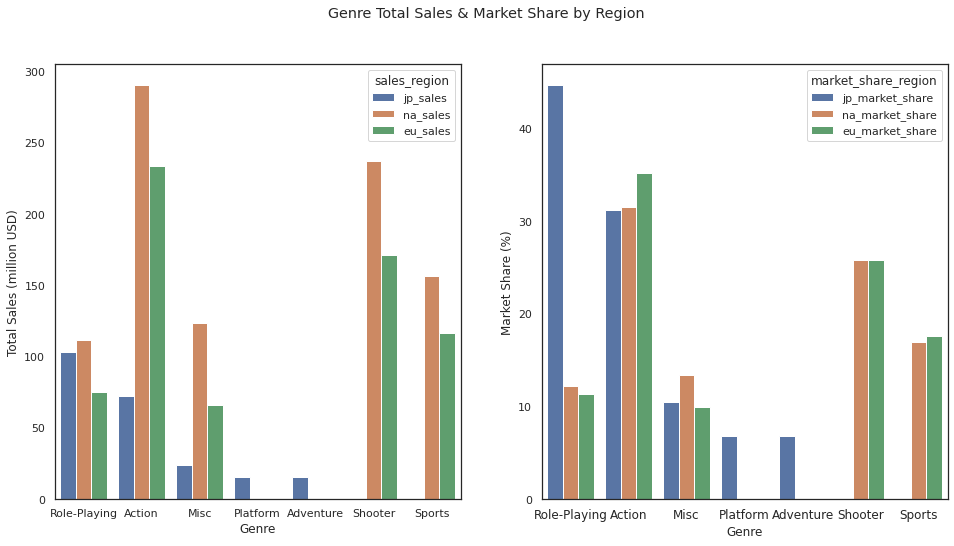

In [50]:
# Bar plot to compare top 5 genres by regional sales & market share across regions

df_genre_jp_na_merged = pd.merge(
    df_games_2010_to_2016_genre_jp, df_games_2010_to_2016_genre_na, on='genre', how='outer')
df_genre_regions_merged = pd.merge(
    df_genre_jp_na_merged, df_games_2010_to_2016_genre_eu, on='genre', how='outer')
df_genre_regions_merged.reset_index(inplace=True)
df_genre_regions_merged.fillna(0, inplace=True)

df_genre_regions_market_share = df_genre_regions_merged.fillna(
    0)

df_genre_regions_merged.drop(
    columns={'jp_market_share', 'eu_market_share', 'na_market_share'}, inplace=True)

df_genre_regions_market_share.drop(
    columns={'jp_sales', 'eu_sales', 'na_sales'}, inplace=True)

df_melted_genre_sales = df_genre_regions_merged.melt(
    id_vars=['genre'], var_name='sales_region', value_name='sales')

df_melted_genre_mkt_share = df_genre_regions_market_share.melt(
    id_vars=['genre'], var_name='market_share_region', value_name='market_share')

# set plot style: grey grid in the background:
sns.set(style="white")

# set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(x='genre', y='sales', hue='sales_region',
            data=df_melted_genre_sales, ax=axes[0])

sns.barplot(x='genre', y='market_share',
            hue='market_share_region', data=df_melted_genre_mkt_share, ax=axes[1])

# x-axis tick label
plt.tick_params(axis='x', labelsize=12)

fig.suptitle('Genre Total Sales & Market Share by Region')

# Set x and y-axis labels for the first subplot
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Total Sales (million USD)')

# Set x and y-axis labels for the second subplot
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Market Share (%)')

# show the graph
plt.show()

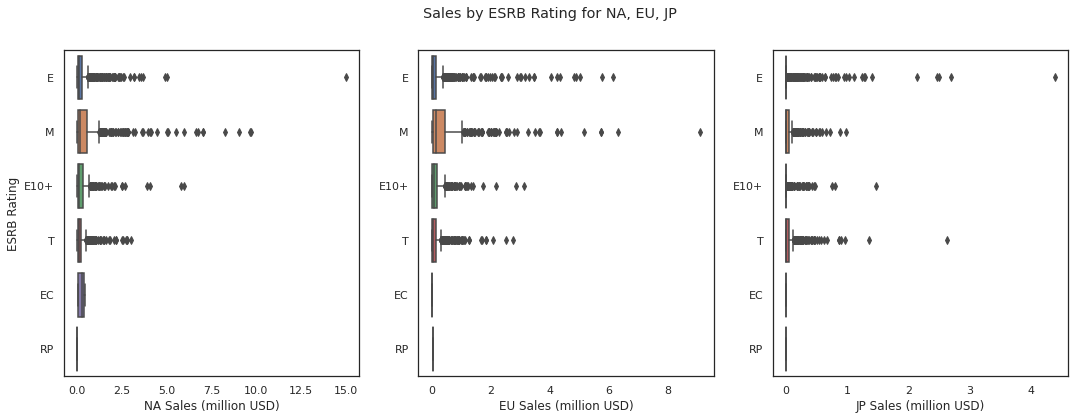

In [51]:
# Study ESRB ratings affect sales in individual regions

# Plot game sales distributions by ESRB rating for each region
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ax = sns.boxplot(data=df_games_2010_to_2016,
                 x='na_sales', y='rating', ax=axes[0])
ax = sns.boxplot(data=df_games_2010_to_2016,
                 x='eu_sales', y='rating', ax=axes[1])
ax = sns.boxplot(data=df_games_2010_to_2016,
                 x='jp_sales', y='rating', ax=axes[2])

fig.suptitle('Sales by ESRB Rating for NA, EU, JP')

# Set x and y-axis labels for the first subplot
axes[0].set_xlabel('NA Sales (million USD)')
axes[0].set_ylabel('ESRB Rating')

# Set x and y-axis labels for the second subplot
axes[1].set_xlabel('EU Sales (million USD)')
axes[1].set_ylabel('')

# Set x and y-axis labels for the third subplot
axes[2].set_xlabel('JP Sales (million USD)')
axes[2].set_ylabel('')

plt.show()


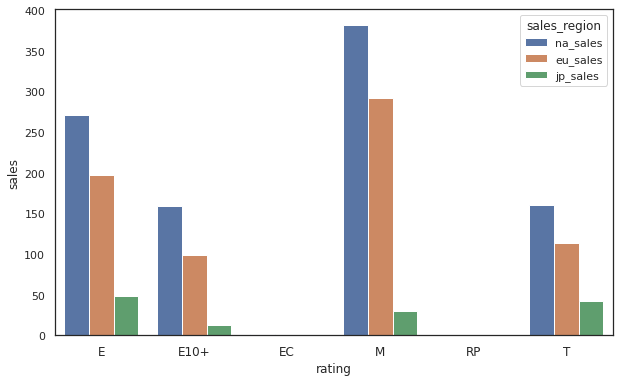

In [52]:
# Get total sales by ESRB rating for each region
df_games_2010_to_2016_grouped_by_rating = df_games_2010_to_2016.groupby(
    ['rating'])[['na_sales', 'eu_sales', 'jp_sales']].sum()
df_games_2010_to_2016_grouped_by_rating = df_games_2010_to_2016_grouped_by_rating.reset_index()

df_melted_sales_by_rating = df_games_2010_to_2016_grouped_by_rating.melt(
    id_vars=['rating'], var_name='sales_region', value_name='sales')

# set plot style:
sns.set(style="white")

plt.figure(figsize=(10, 6))

sns.barplot(x='rating', y='sales', hue='sales_region',
            data=df_melted_sales_by_rating)

# x-axis tick label
plt.tick_params(axis='x', labelsize=12)

# show the graph
plt.show()


M (mature) rated titles sell the most in NA & EU, while titles with E (everyone) rating sell most in Japan. There are minimal sales for titles rated EC (early childhood) & RP (rating pending).

## 5. Testing Hypotheses

The choice of 0.05 for alpha is a reasonable balance between the risk of making a Type I error (rejecting the null hypothesis when it is actually true) and the t-test in this case.

In [53]:
# Hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

# H0(null): average user ratings of Xbox One = average user ratings of PC
# H1(alternative): average user ratings of Xbox One != average user ratings of PC
# This is a 2-sided test

sample_1 = df_games_2010_to_2016[df_games_2010_to_2016['platform'] == 'XOne']['user_score'].dropna()

sample_2 = df_games_2010_to_2016[df_games_2010_to_2016['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

variance_test = st.levene(sample_1, sample_2)

if variance_test.pvalue < alpha:
    Levene_test_result = False
else:
    Levene_test_result = True

print('Variances of the populations should be considered equal?', Levene_test_result)

# Since p-value from levene test is less than alpha, we conclude that variances of the two samples are not equal

results = st.ttest_ind(sample_1, sample_2, equal_var=Levene_test_result)

print('T-test p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


Variances of the populations should be considered equal? False
T-test p-value:  0.9884844253802267
We can't reject the null hypothesis


P-value was much higher than alpha, so we can't reject the null hypothesis. Average user rating of Xbox One ad PC are not significantly different.

In [54]:
# Hypothesis: Average user ratings for the Action and Sports genres are different.

# H0(null): average user ratings for Action genre = average user ratings for Sports genre
# H1(alternative): average user ratings for Action genre != average user ratings for Sports genre
# This is a 2-sided test

sample_1 = df_games_2010_to_2016[df_games_2010_to_2016['genre'] == 'Action']['user_score'].dropna()

sample_2 = df_games_2010_to_2016[df_games_2010_to_2016['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05

variance_test = st.levene(sample_1, sample_2)

if variance_test.pvalue < alpha:
    Levene_test_result = False
else:
    Levene_test_result = True

print('Variances of the populations should be considered equal?', Levene_test_result)

# Since p-value from levene test is less than alpha, we conclude that variances of the two samples are not equal

results = st.ttest_ind(sample_1, sample_2, equal_var=Levene_test_result)

print('T-test p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


Variances of the populations should be considered equal? False
T-test p-value:  5.762483317448945e-16
We reject the null hypothesis


P-value was less than alpha, so we reject the null hypothesis, and conclude that average user rating for Action and Sports genres are significantly different.

## General conclusions
- PS4 & XOne are the only two platforms with growing sales for games released in 2013 and beyond
- Top selling games are available on multiple platforms
- Xbox is not popular in Japan
- E rated titles are most popular in Japan 
- M rated titles are most popular in NA & EU
- User ratings of games on XboxOne and PC platforms are almost the same

Recommendation for 2017 marketing strategy is to focus on games availalble on the PS4 and XOne that are in the Action & Shooter genres with M, E, and T ESCRB rating in NA & EU. Focus on PS3 & 3DS RPG & Action genres with E & T ESRB rating in Japan.